# Exploring Fractals

Exploring different fractals

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Colormap
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['image.cmap'] = 'jet'


# Helper
def image_range(size):
    """
    Iterate through xy coordinates of image
    """
    for i in range(size[0]):
        for j in range(size[1]):
            yield i, j

## Julia/Mandelbrot Set

Use the following iteration function:

$$
z_{n+1} = z_n^2 + c
$$

In [8]:
iterator_function = lambda z, c: z*z + c

The we could set the initial $z$ parameter for each pixel and fix $c$ as a constant ("julia set" fractal, what I'm calling it) 

CPU times: user 1.17 s, sys: 4.26 ms, total: 1.17 s
Wall time: 1.17 s


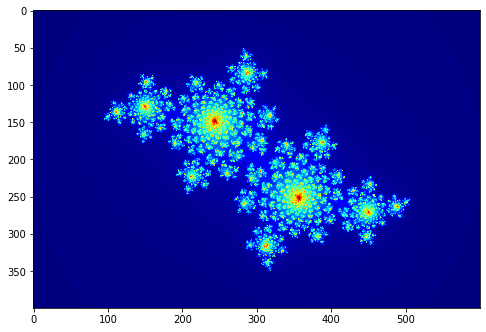

In [21]:
%%time

# Algorithm parameters
size = 600, 400
iterations = 255
c = -0.4 - 0.60j

# Image array
image = np.zeros((size[1], size[0]), dtype=np.uint8)

# Run algorithm on each pixel in image
for i, j in image_range(size):
    z = complex(i - size[0]/2, j - size[1]/2)/max(size)*4
    n = 0
    while abs(z) < 2 and n < iterations:
        z = iterator_function(z, c)
        n += 1
    image[j, i] = n

# Display image
plt.imshow(image);

Or we could set the $c$ constant and start at $z = 0$ for each pixel (mandelbrot set)

CPU times: user 2.99 s, sys: 8.58 ms, total: 3 s
Wall time: 3 s


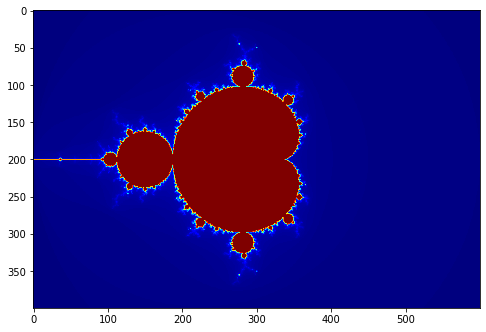

In [22]:
%%time

# Algorithm parameters
size = 600, 400
iterations = 255

# Image array
image = np.zeros((size[1], size[0]), dtype=np.uint8)

# Run algorithm on each pixel in image
for i, j in image_range(size):
    c = complex(i - size[0]/2, j - size[1]/2)/max(size)*4
    z = 0
    n = 0
    while abs(z) < 2 and n < iterations:
        z = iterator_function(z, c)
        n += 1
    image[j, i] = n
        
# Display image
plt.imshow(image);

Polynomial roots fractal using Newton's method

Define complex polynomial function $f(z)$ and find roots of function using Newton's method

$$
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)}
$$

We're going to focus on cubic functions now (which have three roots)

$$
f(z) = (z - r_1)(z - r_2)(z - r_3) 
$$

We can use the product rule to differentiate in this form. The product rule has a useful symmetry that we can exploit

$$
(p r q)' = p'rq + p r'q + p r q'
$$

Since $p$, $q$, and $r$ all take the form of $z - c$ (where $c$ is a constant), each of their individual derivatives reduces to $1$. So we can rewrite the derivative as follows

$$
f'(z) = (z - r_2)(z - r_3) + (z - r_1)(z - r_3) + (z - r_2)(z - r_3)
$$

In [18]:
%%time

def iterator(z, r):
    """
    Iterate z through one step of newton's method
    """
    d = r.shape[0]
    p = z - r
    pp = np.meshgrid(p, p)[0] * (1 - np.eye(d)) + np.eye(d)
    return z - p.prod()/pp.prod(axis=0).sum()

# Return index of root nearest to z
arg_nearest_root = lambda z, r: np.argmin(np.abs(z - r))


# Test with following roots
roots = np.array([ 1, np.sqrt(2)*(-1 + 1j), np.sqrt(2)*(-1 - 1j) ])
seeds = [ 0, 1, -1, 0.25j, -2j, 2j, -10 ]
final = []
for seed in seeds:
    z = seed
    for i in range(256):
        z = iterator(z, roots)
    final.append(z)
    
print('Seed', 'Final', sep='\t')
for seed, fina in zip(seeds, final):
    print(seed, fina, sep='\t')
print()

Seed	Final
0	(1+0j)
1	(1+0j)
-1	(1+0j)
0.25j	(1+0j)
(-0-2j)	(-1.4142135623730951-1.4142135623730951j)
2j	(-1.4142135623730951+1.4142135623730951j)
-10	(1+0j)

CPU times: user 98 ms, sys: 9.44 ms, total: 107 ms
Wall time: 100 ms


If we run the iteration for a grid of complex numbers and color them based on the root that they landed on. We can see a beautiful fractal pattern emerge

Generating:   0%|          | 0/3840000 [00:00<?, ?it/s]

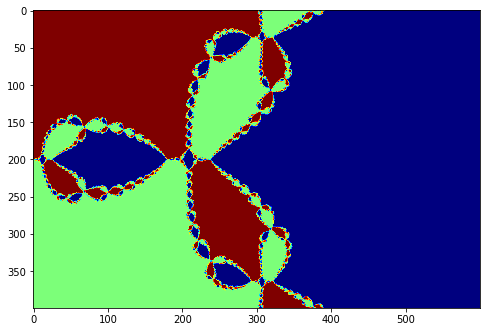

CPU times: user 2min 58s, sys: 13.7 s, total: 3min 12s
Wall time: 3min 2s


In [24]:
%%time

# Create image
size = 600, 400
iterations = 16
image = np.zeros((size[1], size[0]), dtype=np.uint8)

# Polynomial from complex roots
roots = np.array([ 1, np.sqrt(2)*(-1 + 1j), np.sqrt(2)*(-1 - 1j) ])

# Run algorithm for each pixel
progress = tqdm(total=size[0]*size[1]*iterations, desc='Generating')
for i, j in image_range(size):
    z = complex(i - size[0]/2, j - size[1]/2)/max(size)*4
    for _ in range(iterations):
        z = iterator(z, roots)
        progress.update()
    image[j, i] = arg_nearest_root(z, roots)
progress.close()
        
# Show image
image = np.linspace(0, 1, roots.shape[0])[image]
plt.imshow(image);
plt.show();